https://www.kaggle.com/code/robikscube/tutorial-time-series-forecasting-with-xgboost

In [122]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import random

In [186]:
df = pd.read_csv("dummy.csv", index_col='DATETIME')
df.index = pd.to_datetime(df.index, utc=True)
data = df[['aa','bb','cc','dd']]

data['aa'] = np.random.randint(10000, size=len(data['aa'] ))/100
data['bb'] = np.random.randint(10000, size=len(data['aa'] ))/100
data['cc'] = np.random.randint(10000, size=len(data['aa'] ))/100

print(data.tail(10))
print("Earliest Time: ",data.index.min())
print("Latest Point: ",data.index.max())
print("Total Datapoints: ",len(data.index))
split_date = '9/9/2017 0:00'
train = data.loc[data.index <= split_date].copy()
test = data.loc[data.index > split_date].copy()
print("Trainset :", len(train))
print("Trainset :", len(test))

                              aa     bb     cc        dd
DATETIME                                                
2017-12-31 14:00:00+00:00  31.54  88.41  33.67 -2.589788
2017-12-31 15:00:00+00:00  41.74   3.93  79.58 -2.561759
2017-12-31 16:00:00+00:00  51.33  17.90  70.05 -2.533731
2017-12-31 17:00:00+00:00   4.30  40.36  37.39 -2.505702
2017-12-31 18:00:00+00:00  59.50   8.94  83.00 -2.477674
2017-12-31 19:00:00+00:00  39.25  23.20   5.36 -2.449645
2017-12-31 20:00:00+00:00  93.38  45.89  85.34 -2.421617
2017-12-31 21:00:00+00:00  46.33  12.26  57.44 -2.393588
2017-12-31 22:00:00+00:00  19.47  36.28  70.24 -2.365560
2017-12-31 23:00:00+00:00  49.01  86.89  37.41 -2.337531
Earliest Time:  2015-01-01 00:00:00+00:00
Latest Point:  2017-12-31 23:00:00+00:00
Total Datapoints:  26304
Trainset : 23569
Trainset : 2735


C:\Users\Amir\AppData\Local\Temp\ipykernel_8900\3361716202.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['aa'] = np.random.randint(10000, size=len(data['aa'] ))/100
C:\Users\Amir\AppData\Local\Temp\ipykernel_8900\3361716202.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bb'] = np.random.randint(10000, size=len(data['aa'] ))/100
C:\Users\Amir\AppData\Local\Temp\ipykernel_8900\3361716202.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [187]:
def create_features(df, targetlabel, feats):
    """
    Creates time series features from datetime index
    """
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.isocalendar().week
    df = df.reset_index()
    features = ['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']
           
    for i in range(len(feats)):
        features.append(feats[i])
    print(features)

    X = df[features]
    if targetlabel:
        y = df[targetlabel]
        return X, y
    return X


In [188]:
featscols = ['bb','cc']
targetlabel = 'aa'
X_train, y_train = create_features(train, targetlabel = targetlabel,feats=featscols)
X_test, y_test = create_features(test, targetlabel = targetlabel, feats=featscols)
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

['hour', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear', 'dayofmonth', 'weekofyear', 'bb', 'cc']
['hour', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear', 'dayofmonth', 'weekofyear', 'bb', 'cc']
(23569, 10)
(23569,)
(2735, 10)
(2735,)


In [189]:
for col in X_train.columns:
    X_train[col] = X_train[col].astype(float)
for col in X_test.columns:
    X_test[col] = X_test[col].astype(float)

In [190]:
X_train

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,bb,cc
0,0.0,3.0,1.0,1.0,2015.0,1.0,1.0,1.0,74.08,52.97
1,1.0,3.0,1.0,1.0,2015.0,1.0,1.0,1.0,90.92,18.74
2,2.0,3.0,1.0,1.0,2015.0,1.0,1.0,1.0,74.28,67.60
3,3.0,3.0,1.0,1.0,2015.0,1.0,1.0,1.0,32.01,83.84
4,4.0,3.0,1.0,1.0,2015.0,1.0,1.0,1.0,35.35,78.82
...,...,...,...,...,...,...,...,...,...,...
23564,19.0,5.0,3.0,8.0,2017.0,224.0,12.0,32.0,1.16,15.15
23565,20.0,5.0,3.0,8.0,2017.0,224.0,12.0,32.0,56.01,15.47
23566,21.0,5.0,3.0,8.0,2017.0,224.0,12.0,32.0,30.64,56.96
23567,22.0,5.0,3.0,8.0,2017.0,224.0,12.0,32.0,98.03,86.85


In [191]:
X_test

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,bb,cc
0,0.0,6.0,4.0,10.0,2017.0,274.0,1.0,39.0,90.61,47.99
1,1.0,6.0,4.0,10.0,2017.0,274.0,1.0,39.0,11.80,96.55
2,2.0,6.0,4.0,10.0,2017.0,274.0,1.0,39.0,48.90,63.48
3,3.0,6.0,4.0,10.0,2017.0,274.0,1.0,39.0,8.37,59.42
4,4.0,6.0,4.0,10.0,2017.0,274.0,1.0,39.0,57.56,54.93
...,...,...,...,...,...,...,...,...,...,...
2730,19.0,6.0,4.0,12.0,2017.0,365.0,31.0,52.0,23.20,5.36
2731,20.0,6.0,4.0,12.0,2017.0,365.0,31.0,52.0,45.89,85.34
2732,21.0,6.0,4.0,12.0,2017.0,365.0,31.0,52.0,12.26,57.44
2733,22.0,6.0,4.0,12.0,2017.0,365.0,31.0,52.0,36.28,70.24


In [192]:
y_train

0        64.44
1        72.09
2         2.50
3        70.30
4        83.79
         ...  
23564    44.99
23565    22.50
23566    79.67
23567    48.77
23568    17.43
Name: aa, Length: 23569, dtype: float64

In [222]:
 
reg = xgb.XGBRegressor(n_estimators=1000,max_depth=20)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False) # Change verbose to True if you want to see it train

C:\Users\Amir\anaconda3\envs\lstm\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=20, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [223]:
test['predicted'] = reg.predict(X_test)
pjme_all = pd.concat([test, train], sort=False)
pjme_all.tail()

,aa,bb,cc,dd,date,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,predicted
DATETIME,,,,,,,,,,,,,,
2017-08-12 19:00:00+00:00,44.99,1.16,15.15,0.926332,2017-08-12 19:00:00+00:00,19,5,3,8,2017,224,12,32,NaN
2017-08-12 20:00:00+00:00,22.50,56.01,15.47,0.954361,2017-08-12 20:00:00+00:00,20,5,3,8,2017,224,12,32,NaN
2017-08-12 21:00:00+00:00,79.67,30.64,56.96,0.982389,2017-08-12 21:00:00+00:00,21,5,3,8,2017,224,12,32,NaN
2017-08-12 22:00:00+00:00,48.77,98.03,86.85,0.312354,2017-08-12 22:00:00+00:00,22,5,3,8,2017,224,12,32,NaN
2017-08-12 23:00:00+00:00,17.43,40.42,69.63,0.340383,2017-08-12 23:00:00+00:00,23,5,3,8,2017,224,12,32,NaN


In [224]:
test['predicted'].index.min()
test['predicted'].index.max()

Timestamp('2017-12-31 23:00:00+0000', tz='UTC')

In [225]:
pjme_all.head()

,aa,bb,cc,dd,date,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,predicted
DATETIME,,,,,,,,,,,,,,
2017-10-01 00:00:00+00:00,74.90,90.61,47.99,-8.172758,2017-10-01 00:00:00+00:00,0,6,4,10,2017,274,1,39,37.384502
2017-10-01 01:00:00+00:00,87.87,11.80,96.55,-8.842792,2017-10-01 01:00:00+00:00,1,6,4,10,2017,274,1,39,33.618195
2017-10-01 02:00:00+00:00,20.44,48.90,63.48,-8.814764,2017-10-01 02:00:00+00:00,2,6,4,10,2017,274,1,39,44.364349
2017-10-01 03:00:00+00:00,97.17,8.37,59.42,-8.786735,2017-10-01 03:00:00+00:00,3,6,4,10,2017,274,1,39,46.961288
2017-10-01 04:00:00+00:00,7.72,57.56,54.93,-8.758707,2017-10-01 04:00:00+00:00,4,6,4,10,2017,274,1,39,26.345465


C:\Users\Amir\anaconda3\envs\lstm\lib\site-packages\matplotlib\axis.py:1665: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  ret = self.converter.convert(x, self.units, self)


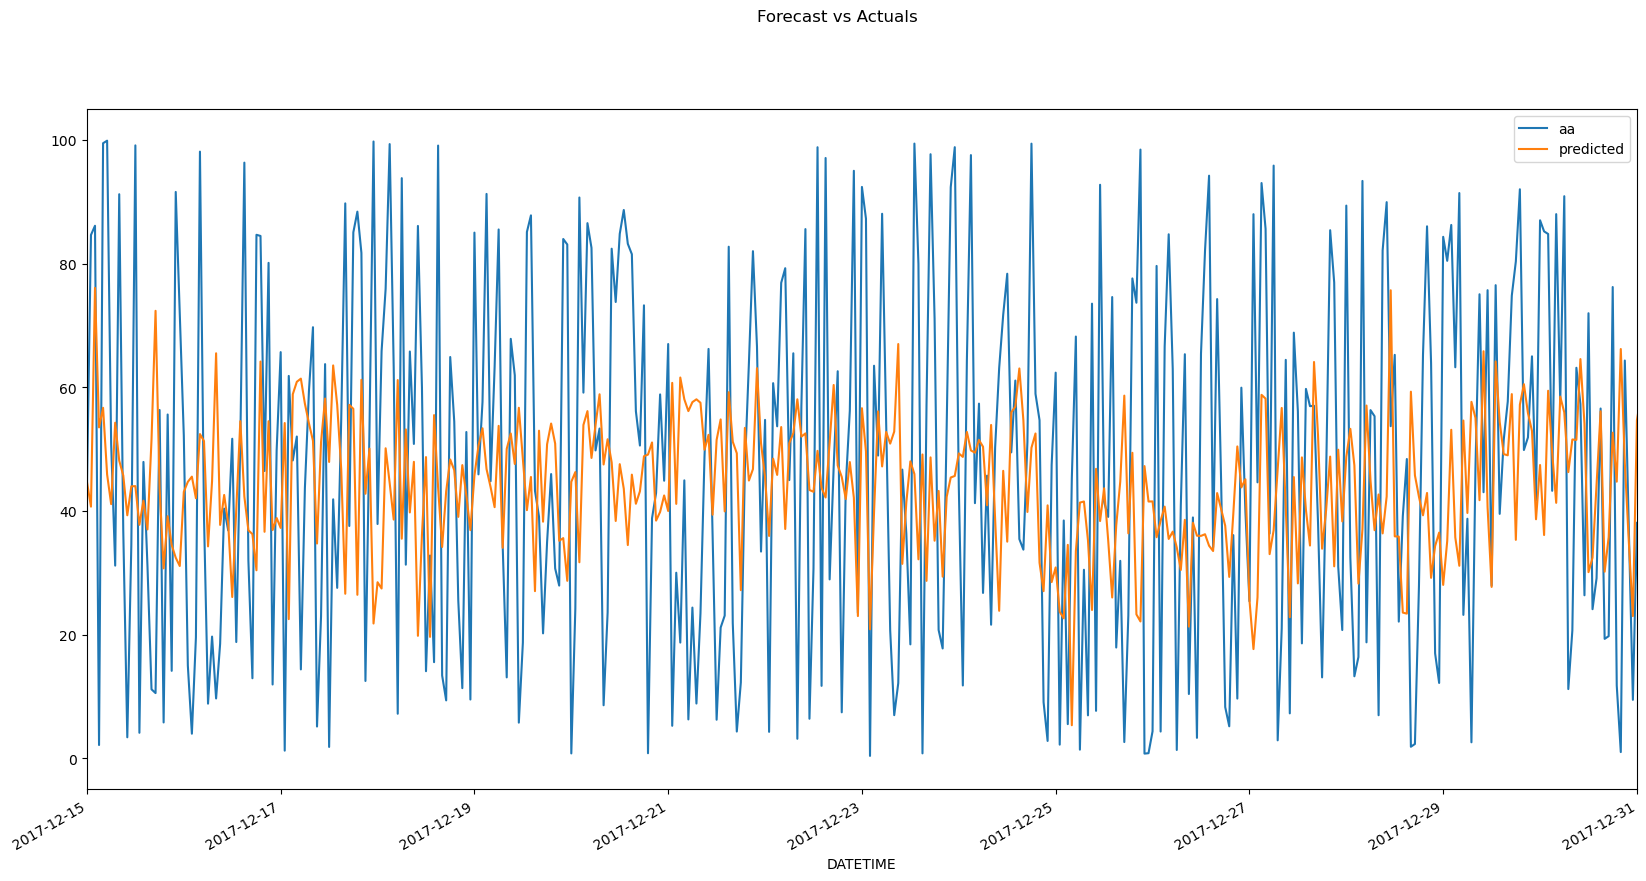

In [226]:
import matplotlib.pyplot as plt

# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(10)
f.set_figwidth(20)
_ = pjme_all[['aa','predicted']].plot(ax=ax, )
ax.set_xbound(lower='15-12-2017', upper='31-12-2017')
#ax.set_ylim(-5,36)
plot = plt.suptitle('Forecast vs Actuals')
